# CMIP6 SST Regional Averages

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import jCMIP as jc
import glob
import pandas as pd

In [2]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

### Get the model experiments

In [3]:
amocdir = '/home/users/jmecking001/DATADIR/HACKATHON/project04/raw_data/CMIP6/amoc'

In [4]:
# All models with AMOC files:
Files  = glob.glob(amocdir + '*/*/*/*.nc')
allModels = []
for ff in Files:
    allModels.append(ff.split('/')[-1].split('_')[0])
# Remove duplicate names:
allModels = list(set(allModels)) 
# Sort in alphabetical order:
allModels.sort()

print(allModels)

['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CESM2', 'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CIESM', 'CMCC-CM2-HR4', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5', 'EC-Earth3', 'EC-Earth3-AerChem', 'EC-Earth3-CC', 'EC-Earth3-Veg', 'EC-Earth3-Veg-LR', 'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'GFDL-CM4', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'IPSL-CM5A2-INCA', 'IPSL-CM6A-LR', 'IPSL-CM6A-LR-INCA', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorCPM1', 'SAM0-UNICON', 'TaiESM1', 'UKESM1-0-LL']


### Generate the list of models in ``CMIPlist`` by running ``generate_cmip6list.ipynb``
Make sure jCMIP is installed...

In [82]:
Clist = jc.readList('CMIP6list')

### Directory of model masks
Contain two AMV style boxes, one box over the NA SPG (box_sd1) and one over the SA STG (box_sd2)

In [13]:
sst_mask_dir = '/home/users/train055/project04/data/processed_data/sst_boxes/'

In [60]:
mask_file_list = glob.glob((sst_mask_dir + '*.nc'))
mask_model_list = []
for ii, path in enumerate(mask_list):
    split_path = path.split('/')
    mask_model_list.append(split_path[-1][:-12])

### Load the working model list

In [44]:
model_list = pd.read_csv('/home/users/train055/project04/working_amoc_list', header=None)

In [77]:
def calc_annual_mean_var(dset, box_name, var='tos'):
    
    amean_var = ((dset[var] * dset[box_name]).sum(axis=(1,2)) / dset[box_name].sum()).groupby('time.year').mean()
    
    return amean_var

In [89]:
amean_dset_hist_amv1 = xr.Dataset()
amean_dset_ssp126_amv1 = xr.Dataset()
amean_dset_ssp245_amv1 = xr.Dataset()
amean_dset_ssp585_amv1 = xr.Dataset()

amean_dset_hist_amv2 = xr.Dataset()
amean_dset_ssp126_amv2 = xr.Dataset()
amean_dset_ssp245_amv2 = xr.Dataset()
amean_dset_ssp585_amv2 = xr.Dataset()

amean_dset_hist_sd1 = xr.Dataset()
amean_dset_ssp126_sd1 = xr.Dataset()
amean_dset_ssp245_sd1 = xr.Dataset()
amean_dset_ssp585_sd1 = xr.Dataset()

amean_dset_hist_sd2 = xr.Dataset()
amean_dset_ssp126_sd2 = xr.Dataset()
amean_dset_ssp245_sd2 = xr.Dataset()
amean_dset_ssp585_sd2 = xr.Dataset()

var='tos'
vtype='Omon'

for ii, model in enumerate(model_list[0]):
    
    # Check we have a model mask...
    
    if model in mask_model_list:
    
        files = Clist[model].getFiles(var=var, EXP=model_list[1][ii][1:], vtype=vtype, ENS=model_list[2][ii][1:])
        files_area = mask_file_list[mask_model_list.index(model)]

        if len(files) != 0:

            dset = xr.open_mfdataset(files, use_cftime=True)
            dset_area = xr.open_dataset(files_area)

            dset = xr.merge([dset, dset_area], compat='override')
            
#             dset['areacello'].data[np.isnan(dset[var].isel(time=0).compute())] = 0
            
            # Box AMV1
            amean_var = calc_annual_mean_var(dset, 'box_amv1')
            
            if model_list[1][ii][1:] == 'historical':
                amean_dset_hist_amv1[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp126': 
                amean_dset_ssp126_amv1[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp245': 
                amean_dset_ssp245_amv1[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp585': 
                amean_dset_ssp585_amv1[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
                
            # Box AMV2
            amean_var = calc_annual_mean_var(dset, 'box_amv2')
            
            if model_list[1][ii][1:] == 'historical':
                amean_dset_hist_amv2[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp126': 
                amean_dset_ssp126_amv2[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp245': 
                amean_dset_ssp245_amv2[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp585': 
                amean_dset_ssp585_amv2[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
                
            # Box SD1
            amean_var = calc_annual_mean_var(dset, 'box_sd1')
            
            if model_list[1][ii][1:] == 'historical':
                amean_dset_hist_sd1[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp126': 
                amean_dset_ssp126_sd1[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp245': 
                amean_dset_ssp245_sd1[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp585': 
                amean_dset_ssp585_sd1[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            
            # Box SD2
            amean_var = calc_annual_mean_var(dset, 'box_sd2')
            
            if model_list[1][ii][1:] == 'historical':
                amean_dset_hist_sd2[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp126': 
                amean_dset_ssp126_sd2[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp245': 
                amean_dset_ssp245_sd2[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp585': 
                amean_dset_ssp585_sd2[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()


/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [93]:
amean_dset_hist_amv1.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_historical_annual_mean_amv1_tos.nc')
amean_dset_ssp126_amv1.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp126_annual_mean_amv1_tos.nc')
amean_dset_ssp245_amv1.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp245_annual_mean_amv1_tos.nc')
amean_dset_ssp585_amv1.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp585_annual_mean_amv1_tos.nc')

amean_dset_hist_amv2.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_historical_annual_mean_amv2_tos.nc')
amean_dset_ssp126_amv2.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp126_annual_mean_amv2_tos.nc')
amean_dset_ssp245_amv2.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp245_annual_mean_amv2_tos.nc')
amean_dset_ssp585_amv2.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp585_annual_mean_amv2_tos.nc')

amean_dset_hist_sd1.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_historical_annual_mean_sd1_tos.nc')
amean_dset_ssp126_sd1.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp126_annual_mean_sd1_tos.nc')
amean_dset_ssp245_sd1.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp245_annual_mean_sd1_tos.nc')
amean_dset_ssp585_sd1.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp585_annual_mean_sd1_tos.nc')

amean_dset_hist_sd2.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_historical_annual_mean_sd2_tos.nc')
amean_dset_ssp126_sd2.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp126_annual_mean_sd2_tos.nc')
amean_dset_ssp245_sd2.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp245_annual_mean_sd2_tos.nc')
amean_dset_ssp585_sd2.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp585_annual_mean_sd2_tos.nc')


### Make some plots to check...

In [94]:
for ii, model in enumerate(amean_dset_hist_amv1):
    print(model)

ACCESS-CM2_r1i1p1f1
CESM2_r1i1p1f1
CMCC-CM2-SR5_r1i1p1f1
CanESM5_r11i1p1f1
EC-Earth3_r1i1p1f1
IPSL-CM6A-LR_r1i1p1f1
MIROC6_r1i1p1f1
MPI-ESM1-2-HR_r1i1p1f1
MPI-ESM1-2-LR_r1i1p1f1


Text(0.5, 1.0, 'tos ssp585 amv1')

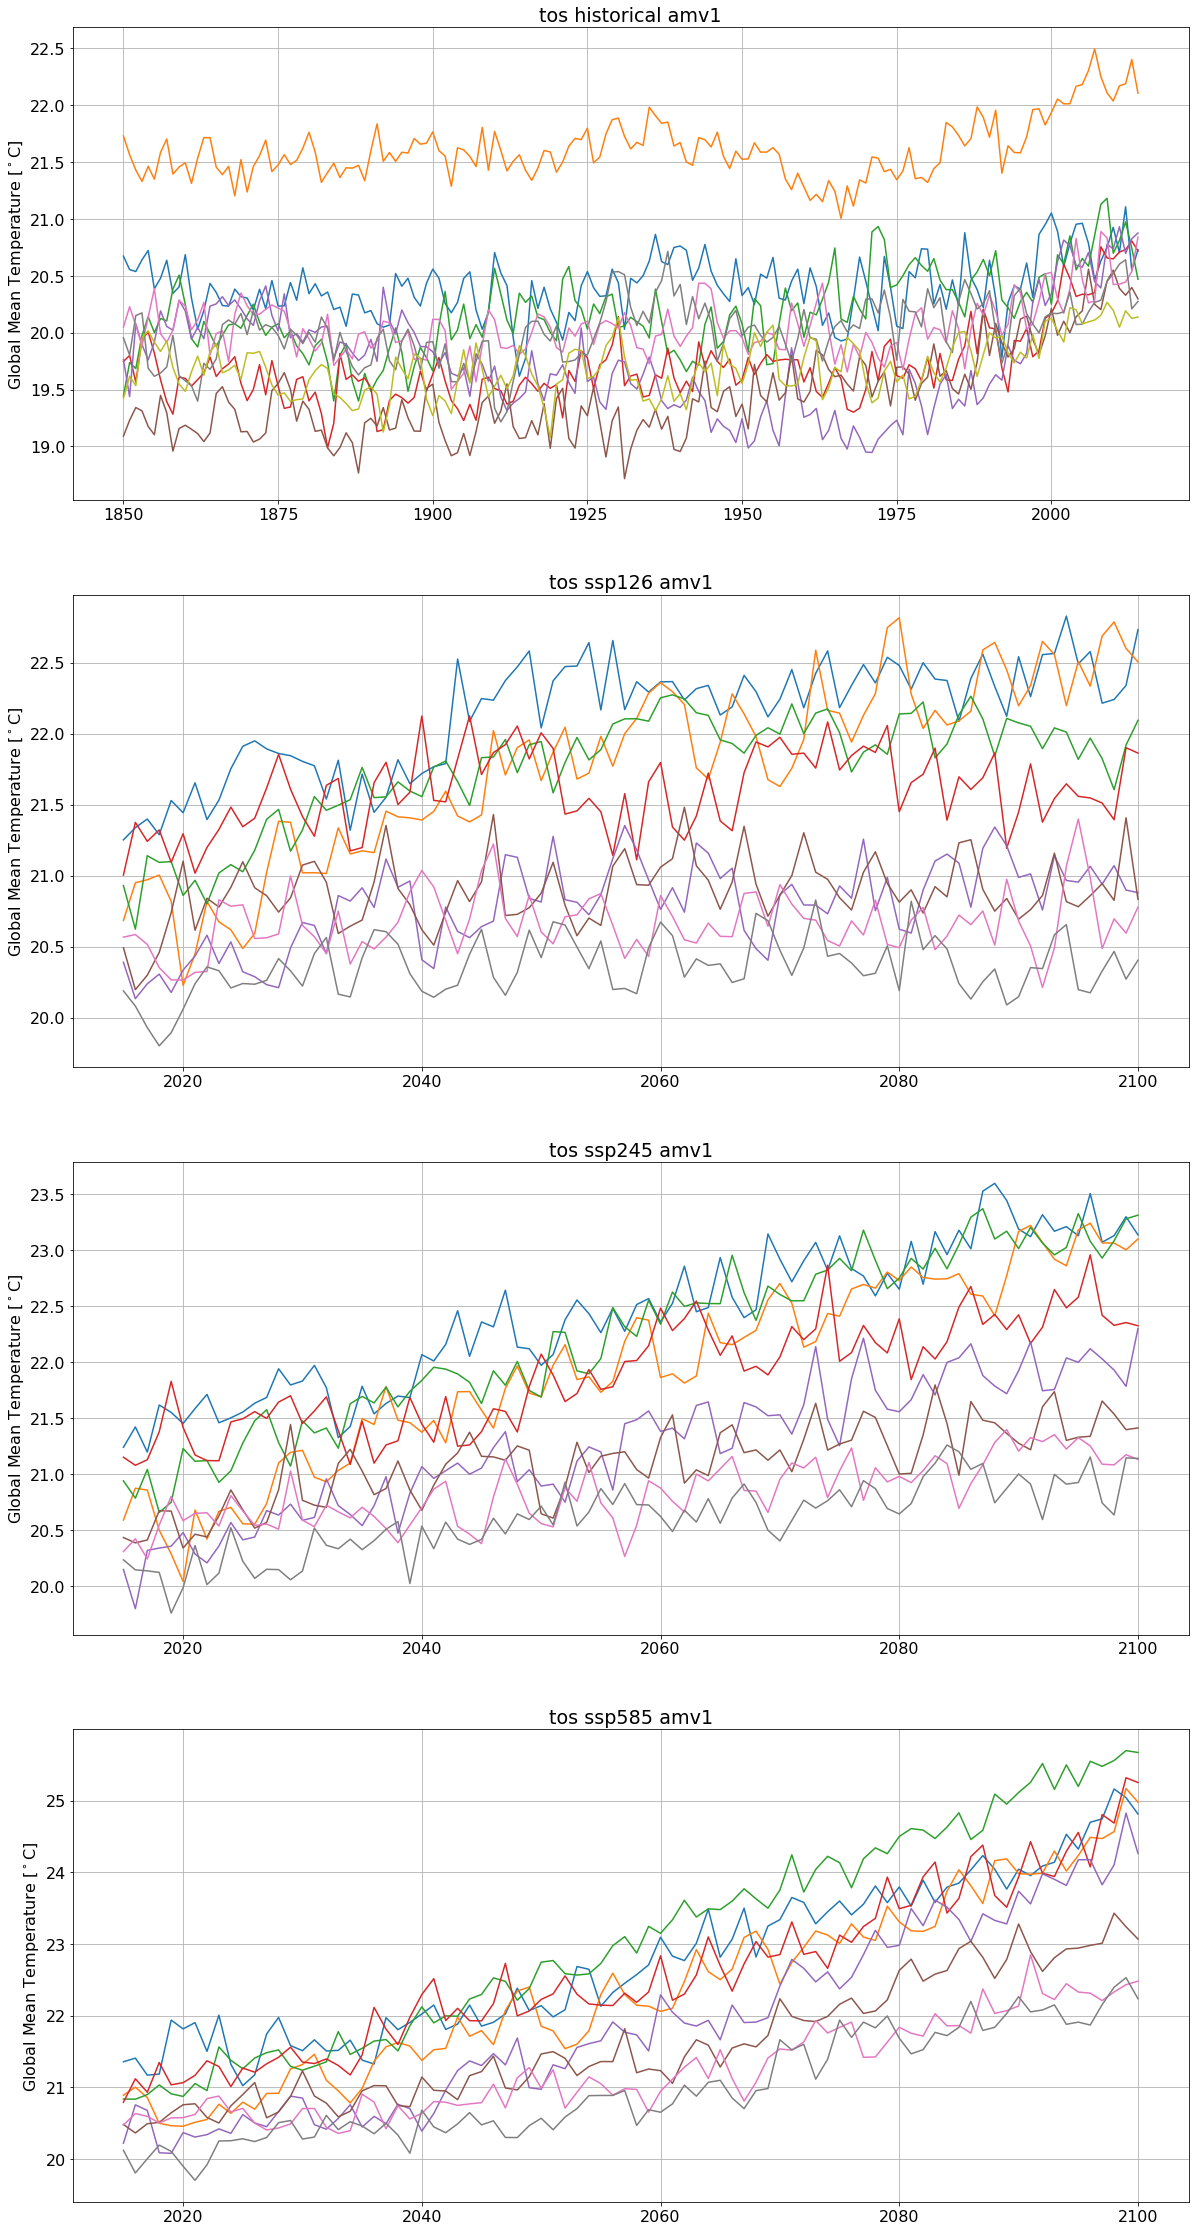

In [101]:
fig, ax = plt.subplots(4, 1, figsize=(20,40))

for ii, model in enumerate(amean_dset_hist_amv1):
    
    amean_dset_hist_amv1[model].plot(ax=ax[0])

ax[0].grid(True)
ax[0].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[0].set_xlabel(None)
ax[0].set_title(('tos' + ' historical' + ' amv1'))

for ii, model in enumerate(amean_dset_ssp126_amv1):
    
    amean_dset_ssp126_amv1[model].plot(ax=ax[1])

ax[1].grid(True)
ax[1].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[1].set_xlabel(None)
ax[1].set_title(('tos' + ' ssp126' + ' amv1'))

for ii, model in enumerate(amean_dset_ssp245_amv1):
    
    amean_dset_ssp245_amv1[model].plot(ax=ax[2])

ax[2].grid(True)
ax[2].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[2].set_xlabel(None)
ax[2].set_title(('tos' + ' ssp245' + ' amv1'))

for ii, model in enumerate(amean_dset_ssp585_amv1):
    
    amean_dset_ssp585_amv1[model].plot(ax=ax[3])

ax[3].grid(True)
ax[3].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[3].set_xlabel(None)
ax[3].set_title(('tos' + ' ssp585' + ' amv1'))

# plt.savefig('/gws/pw/j05/cop26_hackathons/bristol/project04/amoc_sst/cmip6_historical_annual_mean_tos.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'tos ssp585 amv2')

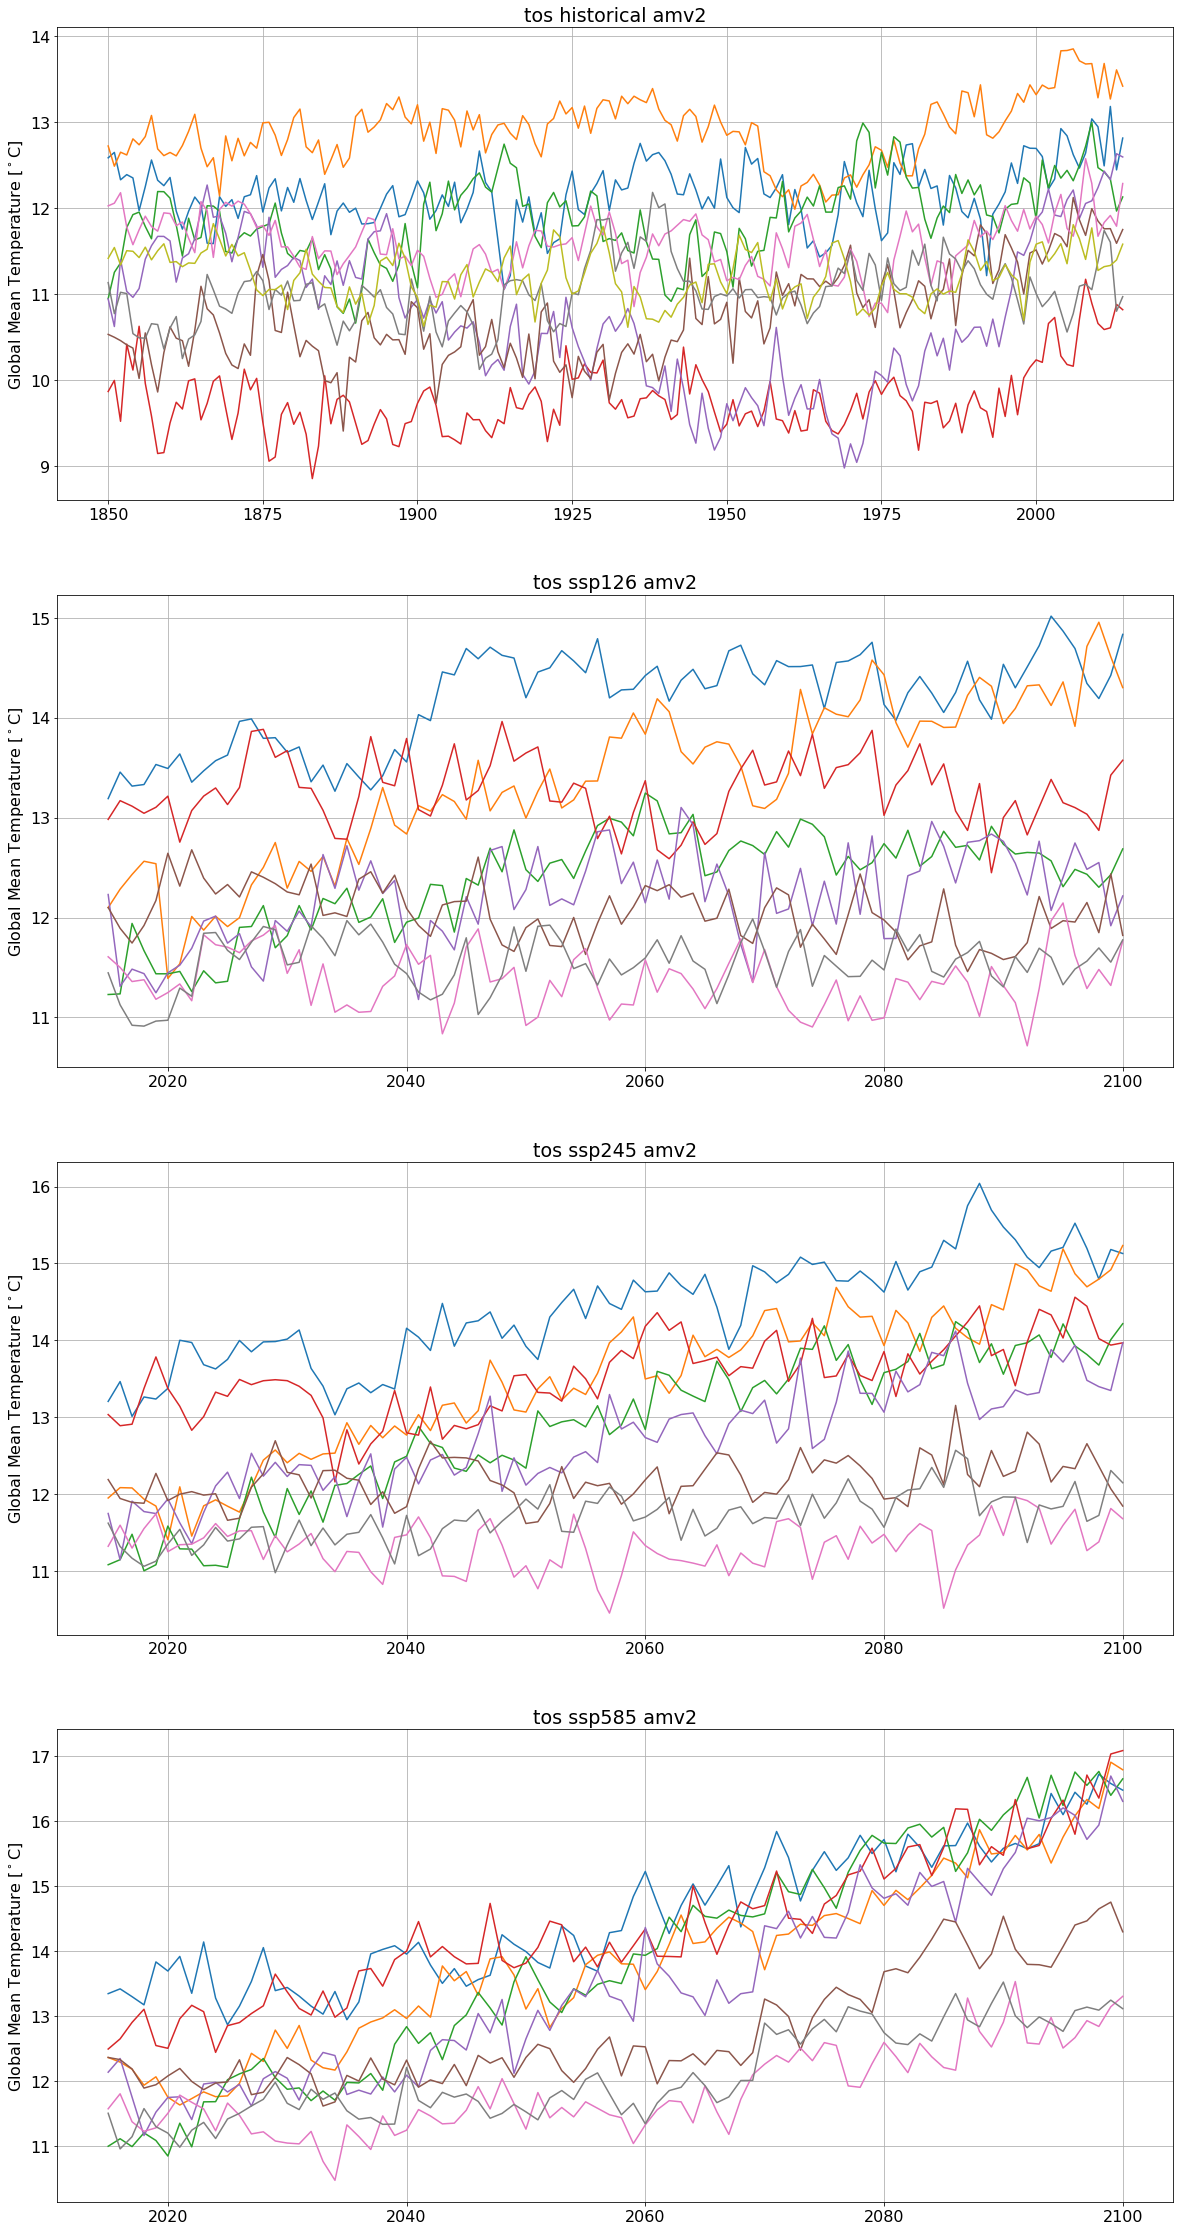

In [102]:
fig, ax = plt.subplots(4, 1, figsize=(20,40))

for ii, model in enumerate(amean_dset_hist_amv2):
    
    amean_dset_hist_amv2[model].plot(ax=ax[0])

ax[0].grid(True)
ax[0].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[0].set_xlabel(None)
ax[0].set_title(('tos' + ' historical' + ' amv2'))

for ii, model in enumerate(amean_dset_ssp126_amv2):
    
    amean_dset_ssp126_amv2[model].plot(ax=ax[1])

ax[1].grid(True)
ax[1].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[1].set_xlabel(None)
ax[1].set_title(('tos' + ' ssp126' + ' amv2'))

for ii, model in enumerate(amean_dset_ssp245_amv2):
    
    amean_dset_ssp245_amv2[model].plot(ax=ax[2])

ax[2].grid(True)
ax[2].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[2].set_xlabel(None)
ax[2].set_title(('tos' + ' ssp245' + ' amv2'))

for ii, model in enumerate(amean_dset_ssp585_amv2):
    
    amean_dset_ssp585_amv2[model].plot(ax=ax[3])

ax[3].grid(True)
ax[3].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[3].set_xlabel(None)
ax[3].set_title(('tos' + ' ssp585' + ' amv2'))

# plt.savefig('/gws/pw/j05/cop26_hackathons/bristol/project04/amoc_sst/cmip6_historical_annual_mean_tos.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'tos ssp585 sd1')

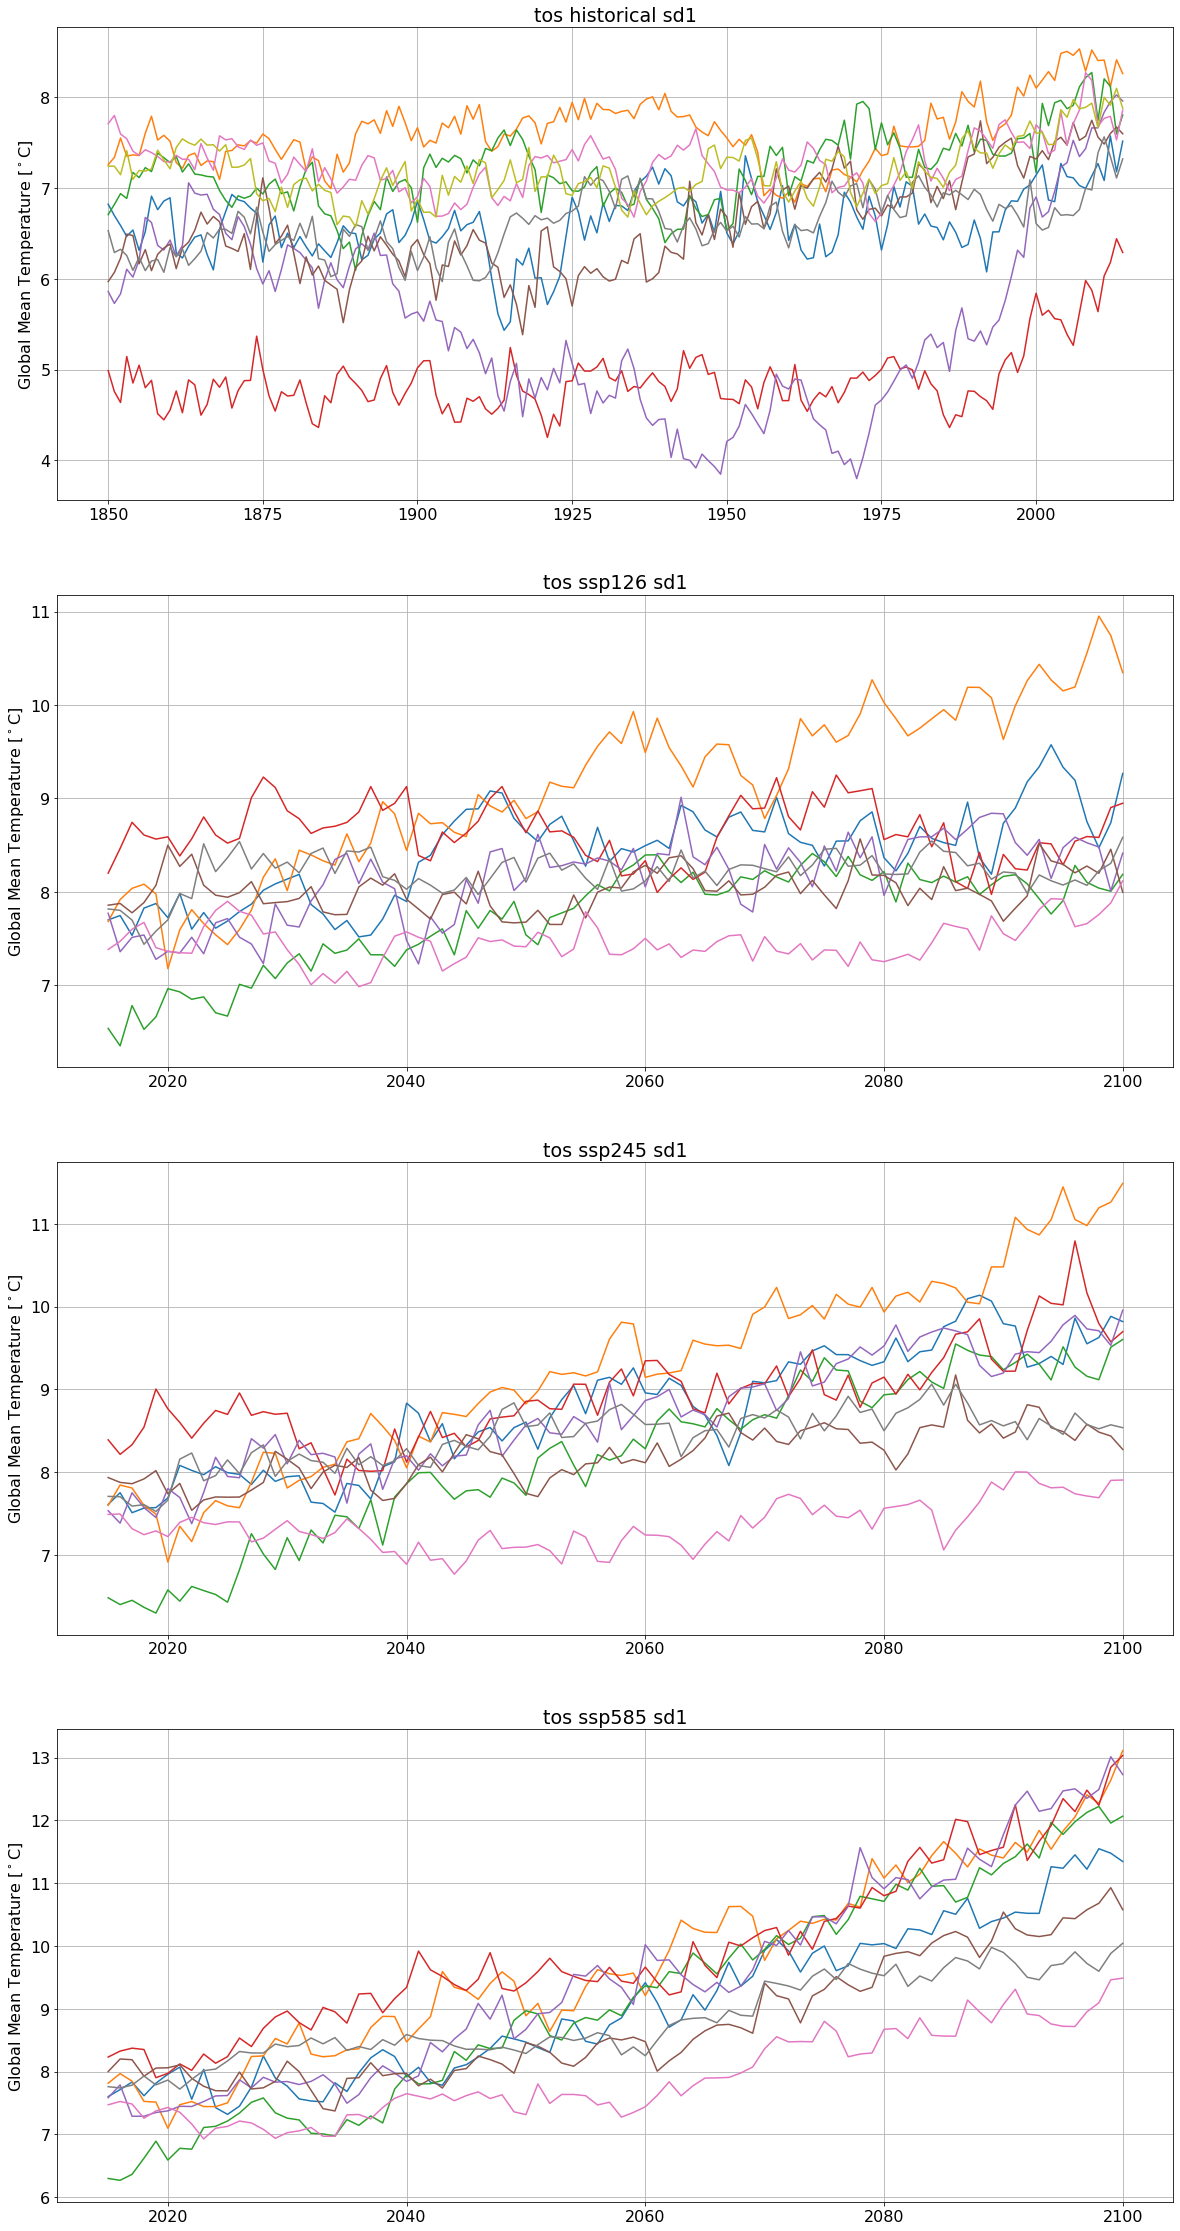

In [103]:
fig, ax = plt.subplots(4, 1, figsize=(20,40))

for ii, model in enumerate(amean_dset_hist_sd1):
    
    amean_dset_hist_sd1[model].plot(ax=ax[0])

ax[0].grid(True)
ax[0].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[0].set_xlabel(None)
ax[0].set_title(('tos' + ' historical' + ' sd1'))

for ii, model in enumerate(amean_dset_ssp126_sd1):
    
    amean_dset_ssp126_sd1[model].plot(ax=ax[1])

ax[1].grid(True)
ax[1].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[1].set_xlabel(None)
ax[1].set_title(('tos' + ' ssp126' + ' sd1'))

for ii, model in enumerate(amean_dset_ssp245_sd1):
    
    amean_dset_ssp245_sd1[model].plot(ax=ax[2])

ax[2].grid(True)
ax[2].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[2].set_xlabel(None)
ax[2].set_title(('tos' + ' ssp245' + ' sd1'))

for ii, model in enumerate(amean_dset_ssp585_sd1):
    
    amean_dset_ssp585_sd1[model].plot(ax=ax[3])

ax[3].grid(True)
ax[3].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[3].set_xlabel(None)
ax[3].set_title(('tos' + ' ssp585' + ' sd1'))

# plt.savefig('/gws/pw/j05/cop26_hackathons/bristol/project04/amoc_sst/cmip6_historical_annual_mean_tos.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'tos ssp585 sd2')

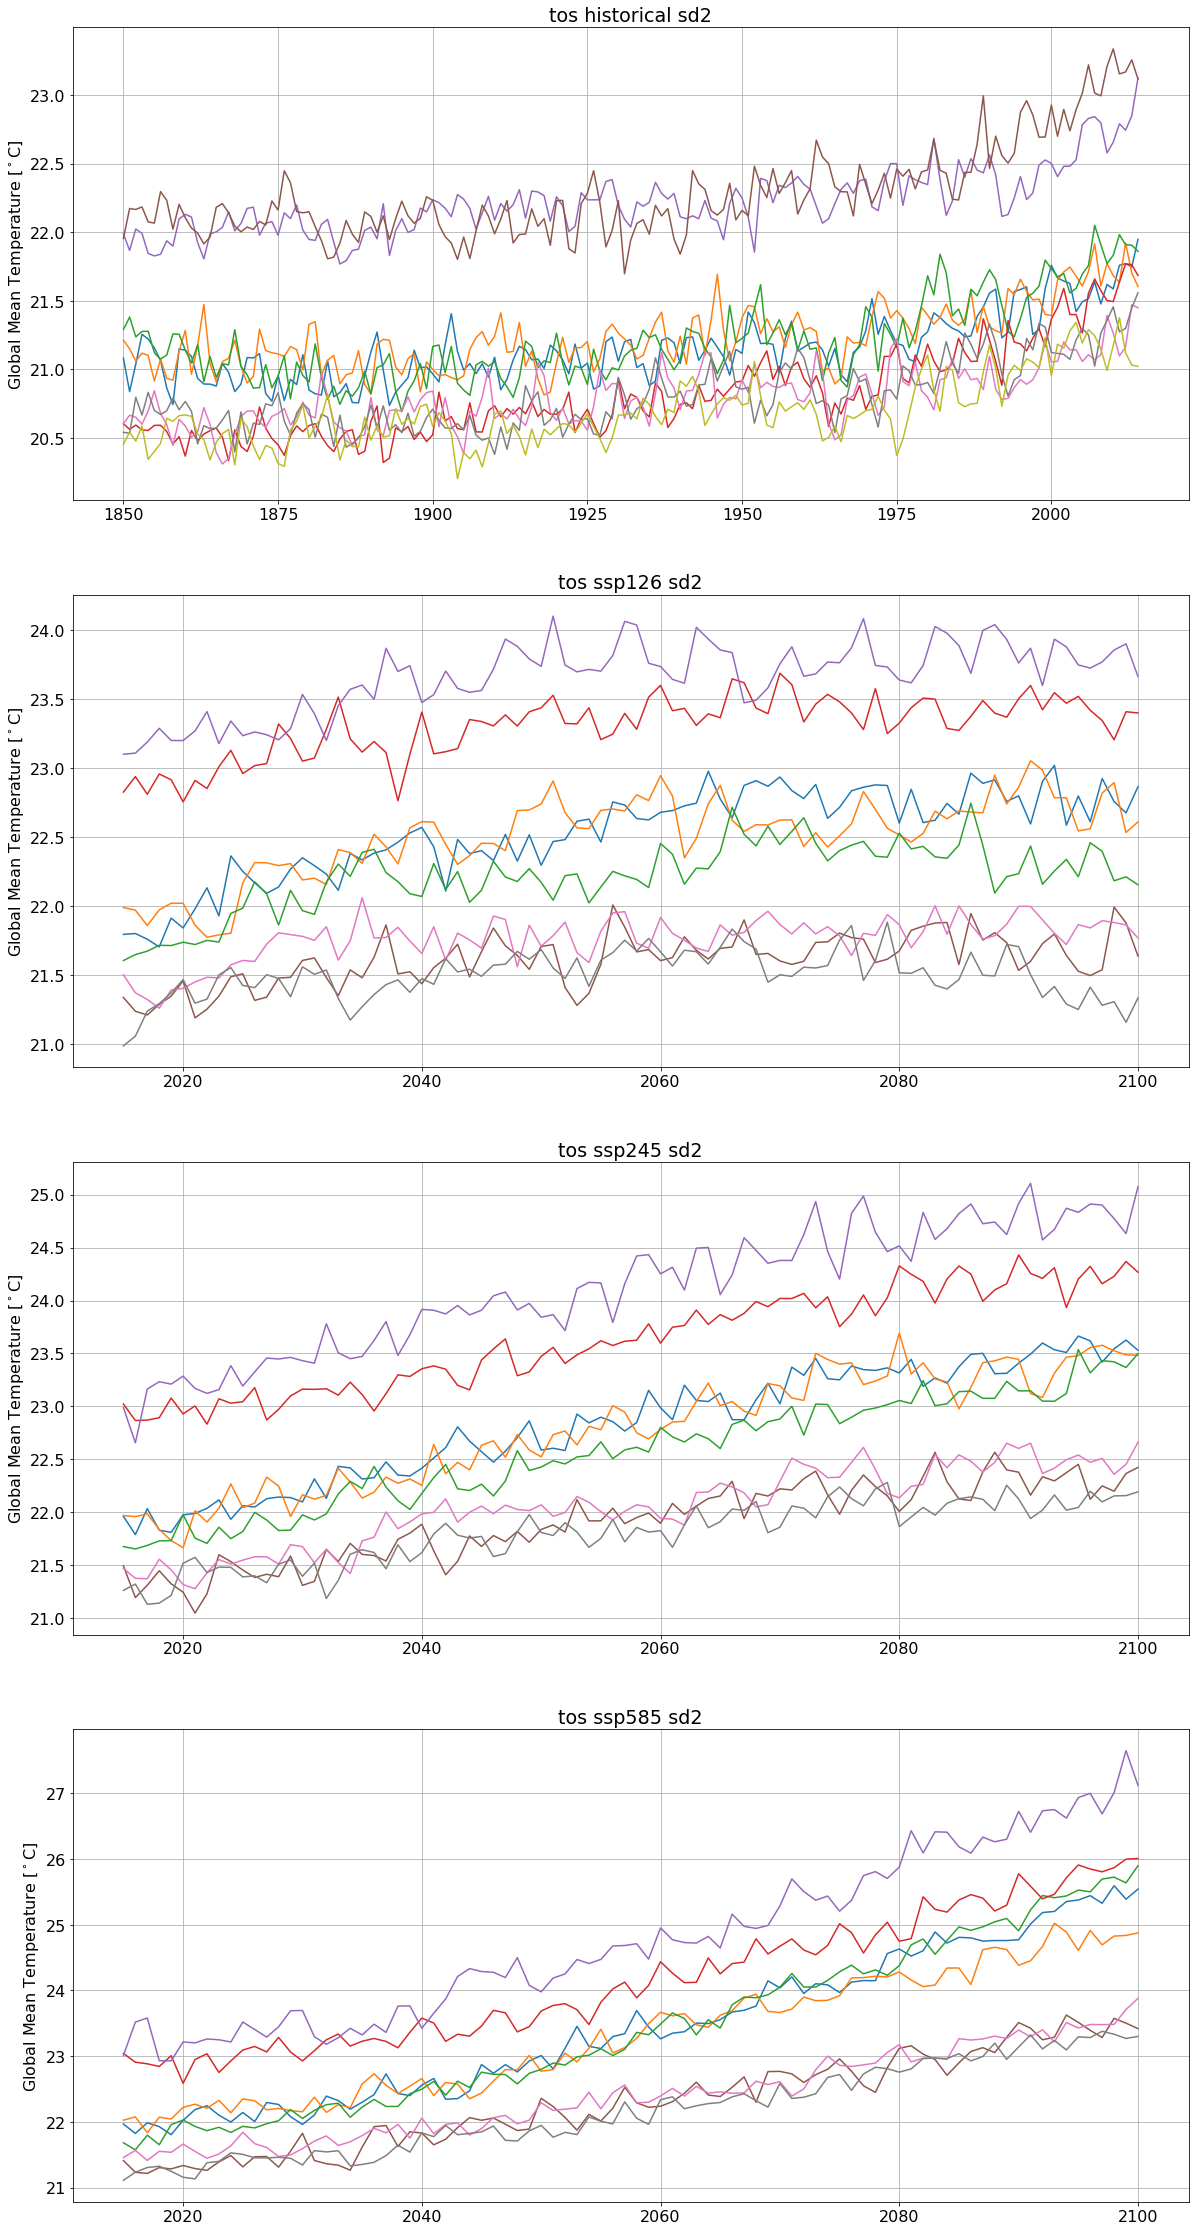

In [105]:
fig, ax = plt.subplots(4, 1, figsize=(20,40))

for ii, model in enumerate(amean_dset_hist_sd2):
    
    amean_dset_hist_sd2[model].plot(ax=ax[0])

ax[0].grid(True)
ax[0].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[0].set_xlabel(None)
ax[0].set_title(('tos' + ' historical' + ' sd2'))

for ii, model in enumerate(amean_dset_ssp126_sd2):
    
    amean_dset_ssp126_sd2[model].plot(ax=ax[1])

ax[1].grid(True)
ax[1].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[1].set_xlabel(None)
ax[1].set_title(('tos' + ' ssp126' + ' sd2'))

for ii, model in enumerate(amean_dset_ssp245_sd2):
    
    amean_dset_ssp245_sd2[model].plot(ax=ax[2])

ax[2].grid(True)
ax[2].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[2].set_xlabel(None)
ax[2].set_title(('tos' + ' ssp245' + ' sd2'))

for ii, model in enumerate(amean_dset_ssp585_sd2):
    
    amean_dset_ssp585_sd2[model].plot(ax=ax[3])

ax[3].grid(True)
ax[3].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[3].set_xlabel(None)
ax[3].set_title(('tos' + ' ssp585' + ' sd2'))

# plt.savefig('/gws/pw/j05/cop26_hackathons/bristol/project04/amoc_sst/cmip6_historical_annual_mean_tos.png', dpi=300, bbox_inches='tight')

## Run for the SPG blob

### Directory of model masks
Contain two AMV style boxes, one box over the NA SPG (box_sd1) and one over the SA STG (box_sd2)

In [106]:
sst_mask_dir = '/home/users/train055/project04/data/processed_data/sst_boxes/'

In [113]:
mask_file_list = glob.glob((sst_mask_dir + '*_subpolarSSTarea.nc'))
mask_model_list = []
for ii, path in enumerate(mask_file_list):
    split_path = path.split('/')
    mask_model_list.append(split_path[-1][:-19])

### Load the working model list

In [116]:
model_list = pd.read_csv('/home/users/train055/project04/working_amoc_list', header=None)

In [117]:
def calc_annual_mean_var(dset, box_name, var='tos'):
    
    amean_var = ((dset[var] * dset[box_name]).sum(axis=(1,2)) / dset[box_name].sum()).groupby('time.year').mean()
    
    return amean_var

In [130]:
amean_dset_hist_spg = xr.Dataset()
amean_dset_ssp126_spg = xr.Dataset()
amean_dset_ssp245_spg = xr.Dataset()
amean_dset_ssp585_spg = xr.Dataset()

var='tos'
vtype='Omon'

for ii, model in enumerate(model_list[0]):
    
    # Check we have a model mask...
    
    if model in mask_model_list:
    
        files = Clist[model].getFiles(var=var, EXP=model_list[1][ii][1:], vtype=vtype, ENS=model_list[2][ii][1:])
        files_area = mask_file_list[mask_model_list.index(model)]

        if len(files) != 0:

            dset = xr.open_mfdataset(files, use_cftime=True)
            dset_area = xr.open_dataset(files_area)

            dset = xr.merge([dset, dset_area], compat='override')
            
#             dset['areacello'].data[np.isnan(dset[var].isel(time=0).compute())] = 0
            
            # SPG
            amean_var = calc_annual_mean_var(dset, '__xarray_dataarray_variable__')
            
            if model_list[1][ii][1:] == 'historical':
                amean_dset_hist_spg[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp126': 
                amean_dset_ssp126_spg[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp245': 
                amean_dset_ssp245_spg[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()
            elif model_list[1][ii][1:] == 'ssp585': 
                amean_dset_ssp585_spg[(model + '_' + model_list[2][ii][1:])] = amean_var.compute()


/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [131]:
amean_dset_hist_spg.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_historical_annual_mean_spg_tos.nc')
amean_dset_ssp126_spg.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp126_annual_mean_spg_tos.nc')
amean_dset_ssp245_spg.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp245_annual_mean_spg_tos.nc')
amean_dset_ssp585_spg.to_netcdf('/home/users/train055/project04/data/processed_data/cmip6_ssp585_annual_mean_spg_tos.nc')

Text(0.5, 1.0, 'tos ssp585 spg')

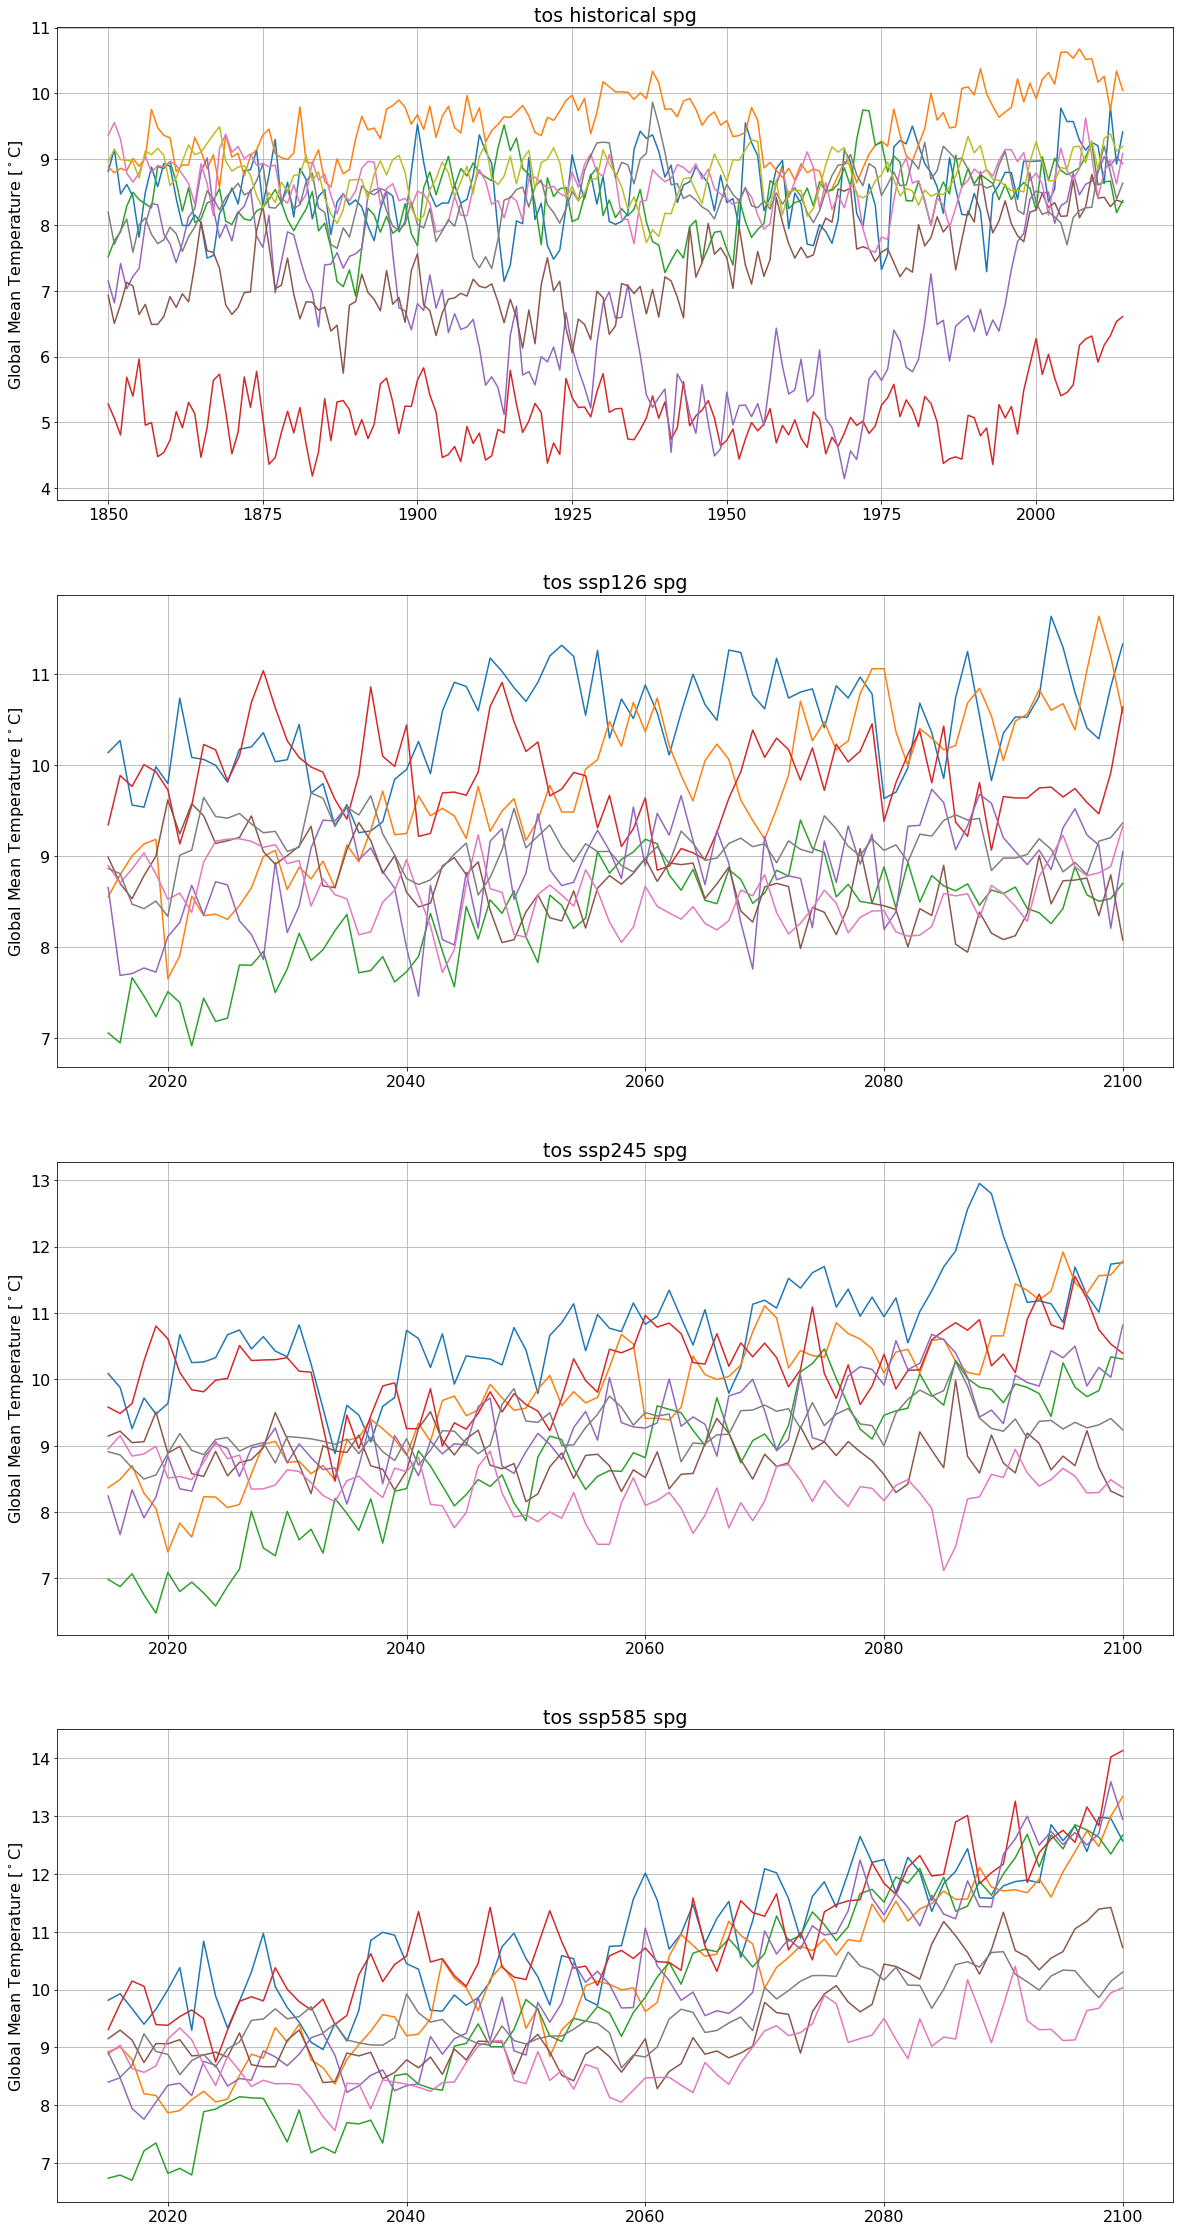

In [132]:
fig, ax = plt.subplots(4, 1, figsize=(20,40))

for ii, model in enumerate(amean_dset_hist_spg):
    
    amean_dset_hist_spg[model].plot(ax=ax[0])

ax[0].grid(True)
ax[0].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[0].set_xlabel(None)
ax[0].set_title(('tos' + ' historical' + ' spg'))

for ii, model in enumerate(amean_dset_ssp126_spg):
    
    amean_dset_ssp126_spg[model].plot(ax=ax[1])

ax[1].grid(True)
ax[1].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[1].set_xlabel(None)
ax[1].set_title(('tos' + ' ssp126' + ' spg'))

for ii, model in enumerate(amean_dset_ssp245_spg):
    
    amean_dset_ssp245_spg[model].plot(ax=ax[2])

ax[2].grid(True)
ax[2].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[2].set_xlabel(None)
ax[2].set_title(('tos' + ' ssp245' + ' spg'))

for ii, model in enumerate(amean_dset_ssp585_spg):
    
    amean_dset_ssp585_spg[model].plot(ax=ax[3])

ax[3].grid(True)
ax[3].set_ylabel('Global Mean Temperature [$^\circ$C]')
ax[3].set_xlabel(None)
ax[3].set_title(('tos' + ' ssp585' + ' spg'))

# plt.savefig('/gws/pw/j05/cop26_hackathons/bristol/project04/amoc_sst/cmip6_historical_annual_mean_tos.png', dpi=300, bbox_inches='tight')